In [2]:
import requests
import pandas as pd
import numpy as np

from typing import List, Any, Dict
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

##### data import

In [59]:
yearly_data = []
for year in range(2021, 2026):
    df = pd.read_csv(
        f"../data/{year}.csv",
        sep=";",
        parse_dates=["Tid(norsk normaltid)"],
        dayfirst=True
    )
    yearly_data.append(df)


In [71]:
data: pd.DataFrame = pd.concat(yearly_data, ignore_index=True)
numeric_cols = [
    "Nedbør (1 t)",
    "Lufttemperatur",
    "Lufttrykk i stasjonsnivå",
    "Vindretning",
    "Middelvind",
]

for col in numeric_cols:
    data[col] = data[col].astype(str).str.replace(",", ".") # read csv doesnt handle comma decimals well :(
    data[col] = pd.to_numeric(data[col], errors="coerce", downcast="float") # some values are set to -, which probably means they're missing?
data = data.dropna(subset=numeric_cols)

data_by_time = data.pivot_table(
    index="Tid(norsk normaltid)",
    values=["Nedbør (1 t)",	"Lufttemperatur", "Lufttrykk i stasjonsnivå", "Vindretning", "Middelvind"],
    columns="Navn"
)
data_by_time

Lufttemperatur                       \
Navn                 Bergen - Florida Vangsnes Vossavangen   
Tid(norsk normaltid)                                         
2021-01-01 01:00:00              -0.8      2.7        -2.2   
2021-01-01 02:00:00              -1.2      2.6        -2.2   
2021-01-01 03:00:00              -1.2      2.6        -2.4   
2021-01-01 04:00:00              -1.1      2.4        -2.6   
2021-01-01 05:00:00              -1.3      1.4        -2.5   
...                               ...      ...         ...   
2026-01-01 20:00:00               1.8      2.6        -2.0   
2026-01-01 21:00:00               1.1      2.3        -2.5   
2026-01-01 22:00:00               0.9      2.0        -2.6   
2026-01-01 23:00:00               1.3      1.6        -3.4   
2026-01-02 00:00:00               0.8      1.3        -4.5   

                     Lufttrykk i stasjonsnivå                          \
Navn                         Bergen - Florida    Vangsnes Vossavangen   
Tid(norsk normaltid)                                                    
2021-01-01 01:00:00                999.099976  997.799988  997.500000   
2021-01-01 02:00:00                999.400024  998.000000  997.700012   
2021-01-01 03:00:00                999.799988  998.400024  997.900024   
2021-01-01 04:00:00               1000.000000  998.700012  998.299988   
2021-01-01 05:00:00                999.900024  998.900024  998.599976   
...                                       ...         ...         ...   
2026-01-01 20:00:00                976.500000  974.599976  973.799988   
2026-01-01 21:00:00                977.299988  976.000000  974.500000   
2026-01-01 22:00:00                977.799988  977.200012  975.700012   
2026-01-01 23:00:00                979.000000  978.099976  976.599976   
2026-01-02 00:00:00                980.000000  979.099976  977.700012   

                           Middelvind                          Nedbør (1 t)  \
Navn                 Bergen - Florida Vangsnes Vossavangen Bergen - Florida   
Tid(norsk normaltid)                                                          
2021-01-01 01:00:00               0.7      2.3         0.4              0.0   
2021-01-01 02:00:00               0.6      2.1         0.5              0.0   
2021-01-01 03:00:00               1.5      1.4         0.4              0.0   
2021-01-01 04:00:00               0.5      1.0         0.1              0.0   
2021-01-01 05:00:00               1.2      2.1         0.5              0.0   
...                               ...      ...         ...              ...   
2026-01-01 20:00:00               6.2      4.6         1.2              0.0   
2026-01-01 21:00:00               5.9      4.7         0.6              0.0   
2026-01-01 22:00:00               5.0      3.0         0.8              0.0   
2026-01-01 23:00:00               7.5      3.8         0.6              0.0   
2026-01-02 00:00:00               3.5      5.8         0.7              0.0   

                                               Vindretning           \
Navn                 Vangsnes Vossavangen Bergen - Florida Vangsnes   
Tid(norsk normaltid)                                                  
2021-01-01 01:00:00       0.0         0.0            155.0    148.0   
2021-01-01 02:00:00       0.0         0.0            178.0    155.0   
2021-01-01 03:00:00       0.0         0.0            293.0    165.0   
2021-01-01 04:00:00       0.0         0.0             80.0    176.0   
2021-01-01 05:00:00       0.0         0.0            320.0    163.0   
...                       ...         ...              ...      ...   
2026-01-01 20:00:00       0.0         0.0            353.0     59.0   
2026-01-01 21:00:00       0.0         0.0            346.0    131.0   
2026-01-01 22:00:00       0.0         0.0            348.0    130.0   
2026-01-01 23:00:00       0.0         0.0             21.0    119.0   
2026-01-02 00:00:00       0.0         0.0              1.0    127.0   

                             

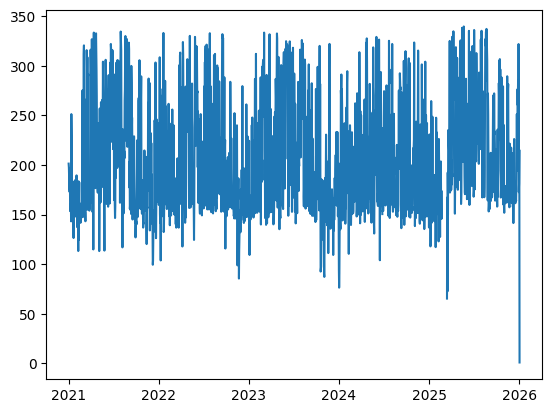

In [82]:
plt.plot(data_by_time.groupby(data_by_time.index.date).mean()["Vindretning"]["Bergen - Florida"])


### 2. Påvirkning fra vær
Hvilke værfaktorer påvirker forbruket i **NO5** mest?  
Er det andre faktorer som påvirker forbruket, i så fall hvilke?